<a href="https://colab.research.google.com/github/monika-modzelewsk/speed-dating/blob/main/projekt_speed_dating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTwsvudn7uoMo6JF81c4Lh9FLUC-6x6Ly-GszvkYKMwEfeoLSsOwnJnACPNLGyCW6j3hm0-pziSa-h6/pub?gid=1285489420&single=true&output=csv', encoding='ISO-8859-1')


In [ ]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(8378, 195)

In [ ]:
data.query('wave == 1').query('gender == 0').loc[:,['iid','pid', 'attr', 'gender']]

,iid,pid,attr,gender
0,1,11.0,6.0,0
1,1,12.0,7.0,0
2,1,13.0,5.0,0
3,1,14.0,7.0,0
4,1,15.0,5.0,0
...,...,...,...,...
95,10,16.0,5.0,0
96,10,17.0,5.0,0
97,10,18.0,5.0,0
98,10,19.0,9.0,0


In [ ]:
data.query('wave == 1').query('gender == 0').loc[:,['iid','pid', 'attr', 'gender']].pivot(['gender','iid'], 'pid', 'attr')

<ipython-input-6-ec210fbc83df>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data.query('wave == 1').query('gender == 0').loc[:,['iid','pid', 'attr', 'gender']].pivot(['gender','iid'], 'pid', 'attr')


pid         11.0  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0
gender iid                                                            
0      1     6.0   7.0   5.0   7.0   5.0   4.0   7.0   4.0   7.0   5.0
       2     5.0   8.0   5.0   7.0   6.0   8.0   7.0   5.0   7.0   6.0
       3     7.0   9.0   7.0   9.0   9.0   8.0   8.0   7.0   9.0   8.0
       4     4.0   8.0   4.0   8.0   6.0   5.0   7.0   5.0   9.0   8.0
       5     5.0   8.0   4.0   8.0   6.0   5.0   6.0   5.0   7.0   9.0
       6     6.0   6.0   4.0   8.0   5.0   3.0   8.0   4.0   7.0   8.0
       7     4.0   6.0   3.0   7.0   4.0   4.0   7.0   5.0   6.0   8.0
       8     5.0   8.0   5.0   8.0   6.0   6.0   6.0   5.0   8.0   7.0
       9     8.0  10.0   5.0  10.0   5.0   8.0   6.0   6.0   8.0   7.0
       10    6.0   1.0   6.0  10.0   5.0   5.0   5.0   5.0   9.0   9.0

In [ ]:
data_subset = data.loc[:, ['iid', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].copy()
data_subset.drop_duplicates(subset = ['iid'], inplace=True)
data_subset.drop(columns='iid', inplace=True)
data_subset.shape


(551, 6)

In [ ]:
data_subset

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,15.0,20.0,20.0,15.0,15.0,15.0
10,45.0,5.0,25.0,20.0,0.0,5.0
20,35.0,10.0,35.0,10.0,10.0,0.0
30,20.0,20.0,20.0,20.0,10.0,10.0
40,20.0,5.0,25.0,25.0,10.0,15.0
...,...,...,...,...,...,...
8268,40.0,10.0,20.0,10.0,0.0,20.0
8290,20.0,20.0,20.0,20.0,0.0,20.0
8312,30.0,3.0,30.0,30.0,3.0,4.0
8334,40.0,20.0,20.0,20.0,0.0,0.0


In [ ]:
data_subset = data_subset.fillna(0)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
scaler = StandardScaler()
data_subset_scaled = scaler.fit_transform(data_subset)
data_subset_scaled

array([[-0.56357468,  0.3952783 ,  0.01192459, -0.33891522,  0.69118926,
         0.51244674],
       [ 1.72202836, -1.6290831 ,  0.70706328,  0.43205261, -1.68129421,
        -1.00249652],
       [ 0.96016068, -0.95429597,  2.09734065, -1.10988305, -0.09963856,
        -1.75996815],
       ...,
       [ 0.57922684, -1.89899795,  1.40220197,  1.97398827, -1.20679752,
        -1.15399085],
       [ 1.34109452,  0.3952783 ,  0.01192459,  0.43205261, -1.68129421,
        -1.75996815],
       [ 3.62669756, -2.30387023, -0.68321409, -0.33891522, -1.68129421,
        -1.75996815]])

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
DBSCAN
dbscan = DBSCAN(eps=7.8, min_samples=11)
labels = dbscan.fit_predict(data_subset)
cluster_counts = pd.Series(labels).value_counts()

print(cluster_counts)

 0    341
-1    210
dtype: int64


In [ ]:
labels

array([ 0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1, -1,
        0,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0, -1,
       -1, -1, -1,  0,  0,  0, -1, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0,
       -1,  0, -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1, -1,  0, -1, -1,
       -1,  0, -1, -1,  0, -1, -1,  0,  0,  0,  0,  0, -1, -1,  0, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
pd.concat([data.drop(columns='iid'), pd.Series(labels)], axis=1)

,id,gender,idg,condtn,wave,round,position,positin1,order,partner,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,0
0,1.0,0,1,1,1,10,7,NaN,4,1,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,0.0
1,1.0,0,1,1,1,10,7,NaN,3,2,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,-1.0
2,1.0,0,1,1,1,10,7,NaN,10,3,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,-1.0
3,1.0,0,1,1,1,10,7,NaN,5,4,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,0.0
4,1.0,0,1,1,1,10,7,NaN,7,5,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,22.0,1,44,2,21,22,14,10.0,5,18,...,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0,NaN
8374,22.0,1,44,2,21,22,13,10.0,4,19,...,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0,NaN
8375,22.0,1,44,2,21,22,19,10.0,10,20,...,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0,NaN
8376,22.0,1,44,2,21,22,3,10.0,16,21,...,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0,NaN


In [ ]:
import numpy as np
_.groupby(['gender',0]).agg({'attr1_1':(len, np.mean)})

attr1_1           
                len       mean
gender 0                      
0      -1.0     168  22.517764
        0.0     236  21.495771
1      -1.0      42  30.523810
        0.0     105  41.583810

In [ ]:
df_viz = pd.DataFrame(data_subset_scaled,
                      columns = data_subset.columns)

df_viz['labels'] = labels
df_viz_ = df_viz.groupby('labels').mean().reset_index().melt(id_vars = ['labels'])

import plotly.express as px
fig = px.line_polar(df_viz_,
                    r = "value",
                    theta = "variable",
                    line_close = True,
                    color = "labels",
                    color_discrete_sequence = px.colors.sequential.Plasma_r)


fig.update_layout(polar = dict(
    radialaxis = dict(
      visible = True,
      range = [-2, 2]
    )),
  showlegend = True
)

fig.show()

In [ ]:
df_viz =  data_subset.fillna(0)
df_viz['labels'] = labels
df_viz_ = df_viz.groupby('labels').mean().reset_index().melt(id_vars=['labels'])

fig = px.line_polar(df_viz_, r="value",
                    theta="variable",
                    line_close=True,
                    color="labels",
                    color_discrete_sequence=px.colors.sequential.Plasma_r)


fig.update_layout(polar=dict(
    radialaxis=dict(
        visible=True,
      range=[0, 50]
    )),
  showlegend=True
)

fig.show()

In [ ]:
from sklearn.decomposition import PCA

# perform PCA
pca = PCA(n_components=2)
data_subset_pca = pca.fit_transform(data_subset_scaled)
data_subset_pca #Transformed dataset

array([[-1.05395796, -0.34714144],
       [ 2.78310354,  0.86099239],
       [ 1.39176233,  0.5088356 ],
       ...,
       [ 1.84692905,  2.7272506 ],
       [ 2.26997468,  0.2882477 ],
       [ 4.88274548, -0.11502331]])

In [ ]:
data_subset_tf = pd.concat([pd.DataFrame(data_subset_pca, columns=['PC1', 'PC2']),
                           pd.DataFrame(labels, columns=['labels'])], axis=1)
data_subset_tf

,PC1,PC2,labels
0,-1.053958,-0.347141,0
1,2.783104,0.860992,-1
2,1.391762,0.508836,-1
3,-0.113240,0.317114,0
4,0.148998,1.568546,0
...,...,...,...
546,1.421401,-1.457320,-1
547,-0.068871,-0.390778,0
548,1.846929,2.727251,-1
549,2.269975,0.288248,-1


<Axes: xlabel='PC1', ylabel='PC2'>

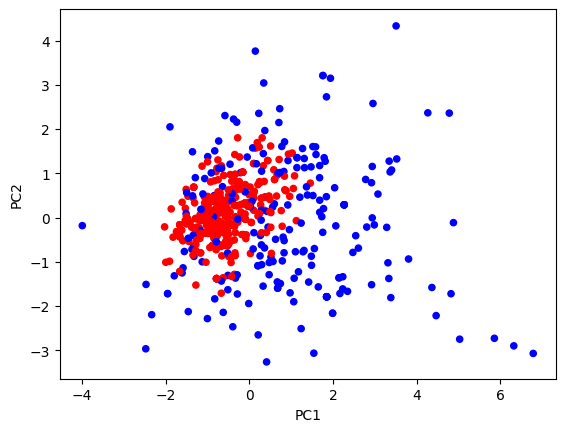

In [ ]:
data_subset_tf.plot.scatter(x='PC1', y='PC2', c=data_subset_tf.labels.replace([-1, 0, 1], ['b', 'r', 'g']))

In [ ]:
print(pca.components_)

[[ 0.64814379 -0.36655405 -0.19851779 -0.00517552 -0.45521444 -0.4459725 ]
 [-0.16800079 -0.31034093  0.34849635  0.79729766  0.15198277 -0.30859718]]


In [ ]:
print("PC1", sum([x**2 for x in pca.components_[0]]))
print("PC2", sum([x**2 for x in pca.components_[1]]))

PC1 1.0000000000000004
PC2 1.0000000000000004


In [ ]:
[(x**2)/sum([x**2 for x in pca.components_[0]]) for x in pca.components_[0]]

[0.42009037081381806,
 0.13436187064450894,
 0.03940931383703484,
 2.6786038396409923e-05,
 0.20722018911092066,
 0.19889146955532092]

In [ ]:
[(x**2)/sum([x**2 for x in pca.components_[1]]) for x in pca.components_[1]]

[0.02822426576023417,
 0.09631149039313376,
 0.12144970384225512,
 0.6356835613349083,
 0.0230987610825388,
 0.0952322175869298]

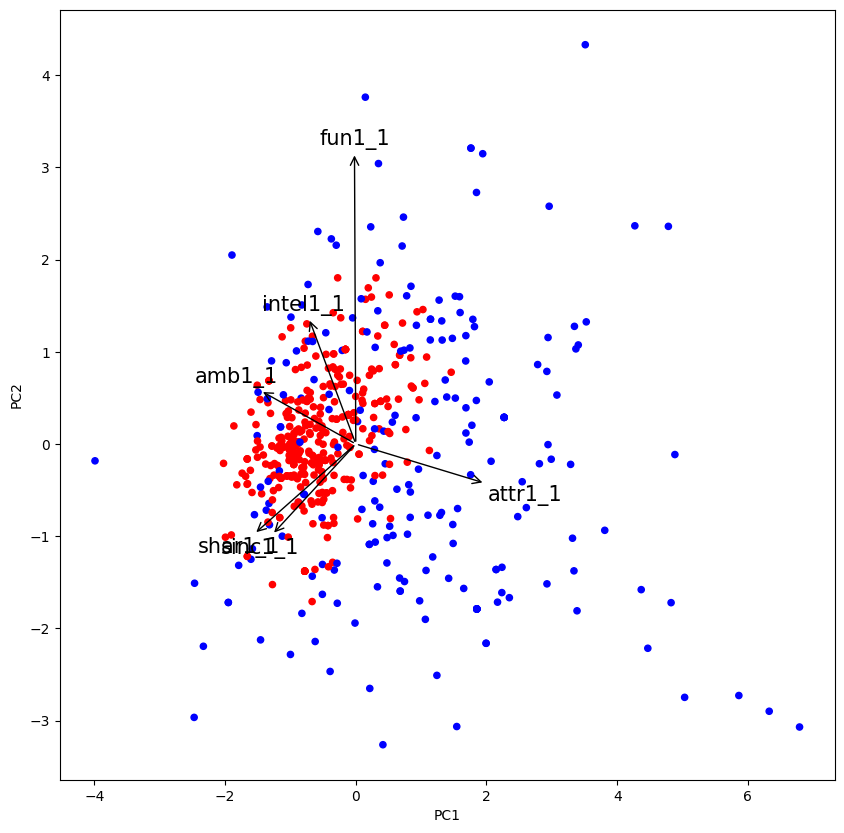

In [ ]:
import matplotlib.pyplot as plt

data_subset_tf.plot.scatter(x='PC1', y='PC2', c=data_subset_tf.labels.replace([-1, 0, 1], ['b', 'r', 'g']), figsize=(10,10))
#plt.arrow(0, 0, pca.components_[0,0]*6, pca.components_[0,1]*6, shape='left')
for i, colname in enumerate(data_subset.columns):
    plt.annotate(colname, ha='center', va='bottom', xy=(0, 0), size=15,
             xytext=(pca.components_[0,i]*4, pca.components_[1,i]*4),
             arrowprops = {'arrowstyle':'<-'})

In [ ]:
import numpy as np
vec = [0, 70, 0, 10, 10, 10]

vec_scaled = scaler.transform(np.array(vec).reshape(1, len(vec)))
np.matmul(pca.components_, vec_scaled.flatten())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([-3.01432971, -3.71943313])

In [ ]:
X = np.array([[70, 0, 10, 10, 0, 10], [0, 70, 0, 10, 10, 10], [0, 0, 70, 10, 10, 10], [0, 0, 0, 70, 10, 10], [0, 10, 0, 10, 70, 10], [0, 10, 0, 10, 10, 70]])
X = StandardScaler().fit_transform(X)

vectors = dbscan.fit_predict(X)
vec_counts = pd.Series(vectors).value_counts()

vec_counts


-1    6
dtype: int64

In [ ]:
vectors

array([-1, -1, -1, -1, -1, -1])

In [ ]:
### -> Task: Make prediction

### Make prediction for following participant's expectations:
### * Sincere  - 'sinc1_1' - 0
vecsin = [0, 70, 0, 10, 10, 10]
### * Intelligent - 'intel1_1' - 0
vecint = [0, 0, 70, 10, 10, 10]
### * Fun - 'fun1_1' - 2
vecfun = [0, 0, 0, 70, 10, 10]
### * Ambitious - 'amb1_1'
vecamb = [0, 10, 0, 10, 70, 10]
### * Shared Interest 'shar1_1' - 0
vecshar = [0, 10, 0, 10, 10, 70]



In [ ]:
vecsin = [0, 70, 0, 10, 10, 10]
vec_scaled = scaler.transform(np.array(vecsin).reshape(1, len(vec)))
np.matmul(pca.components_, vec_scaled.flatten())
gmm.predict(vec_scaled)

In [ ]:
vecint = [0, 0, 70, 10, 10, 10]
vec_scaled = scaler.transform(np.array(vecint).reshape(1, len(vec)))
np.matmul(pca.components_, vec_scaled.flatten())
gmm.predict(vec_scaled)


In [ ]:
vecfun = [0, 0, 0, 70, 10, 10]
vec_scaled = scaler.transform(np.array(vecfun).reshape(1, len(vec)))
np.matmul(pca.components_, vec_scaled.flatten())
gmm.predict(vec_scaled)

In [ ]:
vecamb = [0, 10, 0, 10, 70, 10]
vec_scaled = scaler.transform(np.array(vecamb).reshape(1, len(vec)))
np.matmul(pca.components_, vec_scaled.flatten())
gmm.predict(vec_scaled)

In [ ]:
vecshar = [0, 10, 0, 10, 10, 70]
vec_scaled = scaler.transform(np.array(vecshar).reshape(1, len(vec)))
np.matmul(pca.components_, vec_scaled.flatten())
gmm.predict(vec_scaled)

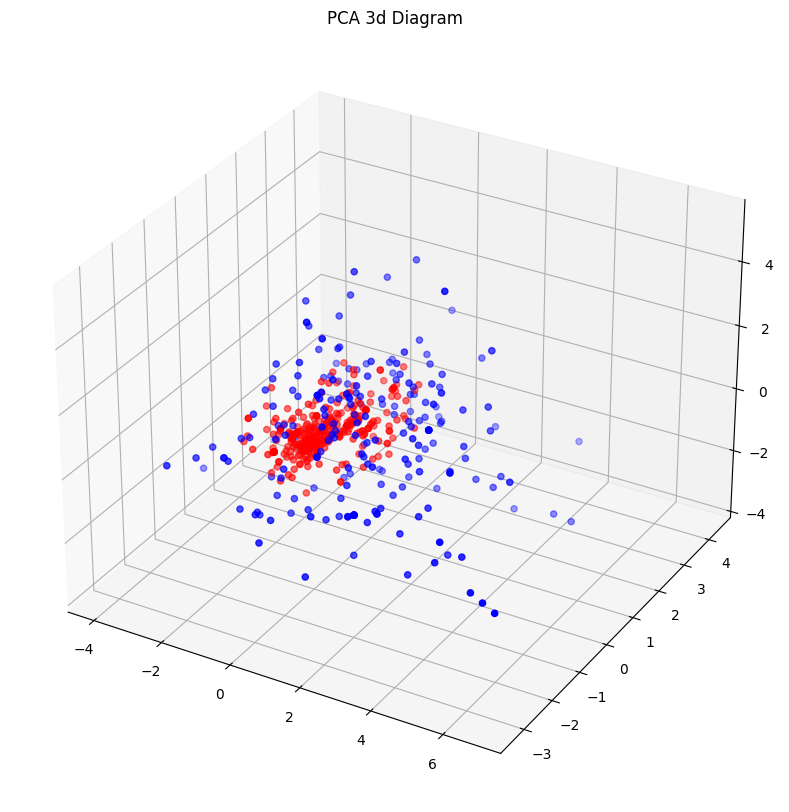

In [ ]:
# Perform PCA
pca = PCA(n_components=3)
data_subset_pca = pca.fit_transform(data_subset_scaled)
data_subsett_pca = pca.fit_transform(data_subset_scaled)
data_subset_pca #Transformed dataset

# Getting it back into Pandas data frame
data_subset_tf = pd.concat([pd.DataFrame(data_subset_pca, columns=['PC1', 'PC2','PC3']),
                           pd.DataFrame(labels, columns=['labels'])], axis=1)
data_subset_tf

# Creating figure
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(data_subset_tf.PC1,
             data_subset_tf.PC2,
             data_subset_tf.PC3,
             color = df_viz.labels.replace([-1, 0, 1], ['b', 'r', 'g']))
plt.title("PCA 3d Diagram")

# show plot
plt.show()

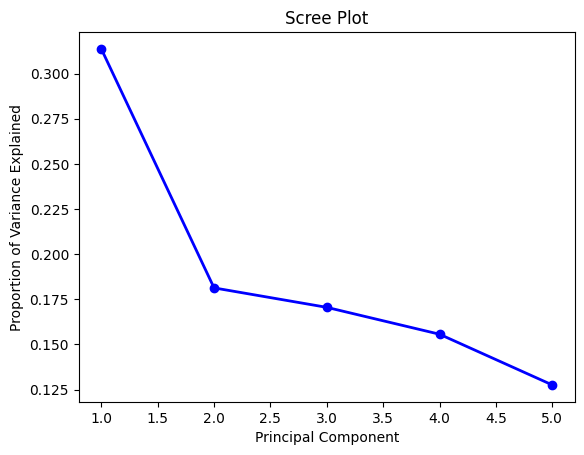

In [ ]:
# instantiate a PCA object and set the number of components to 5
pca = PCA(n_components=5)

# fit the dataset using PCA
pca.fit(data_subset_scaled)

# calculate the proportion of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# create a scree plot
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# calculate WCSS for different k values
epsilons = [3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
            4,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
            5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
            6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
            7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
            8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
            9]
min_samples_values = [5,6,7,8,9,10,11,12,13,14,
                      15,16,17,18,19]
wcss = []

for epsilon in epsilons:
    for min_samples in min_samples_values:
        # Tworzenie i dopasowywanie modelu DBSCAN
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        labels = dbscan.fit_predict(data_subset)

        epsilons
        min_samples_values

        # Obliczanie Silhouette Score
        score = silhouette_score(data_subset, labels)
        wcss.append(score)


best_k = wcss.index(max(wcss)) + 2

print(f"The optimal trial is index {best_k} with a Silhouette score of {max(wcss)}")
wcss

# plot the elbow curve
#plt.bar(range(1, 12), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

The optimal trial is index 892 with a Silhouette score of 0.29039269270701284


[-0.2778471596881508,
 -0.2630758042315499,
 -0.2528547225860315,
 -0.2810869361235064,
 -0.30995009214492397,
 -0.2970865372105027,
 -0.3002781245193606,
 -0.30365910326076834,
 -0.21794497116866235,
 -0.21794497116866235,
 -0.22899103820869965,
 -0.22899103820869965,
 -0.22899103820869965,
 -0.23106252100016797,
 -0.2386477329404789,
 -0.2779921687785065,
 -0.2617408411292959,
 -0.2528547225860315,
 -0.27947257102533823,
 -0.30666153896864173,
 -0.2970865372105027,
 -0.3002781245193606,
 -0.30365910326076834,
 -0.21794497116866235,
 -0.21794497116866235,
 -0.22686954607553977,
 -0.22686954607553977,
 -0.22899103820869965,
 -0.23106252100016797,
 -0.2386477329404789,
 -0.2742675567745949,
 -0.25713405491413543,
 -0.24295609770468424,
 -0.27034929990157985,
 -0.27291337347090394,
 -0.28139385188302374,
 -0.2871118869453973,
 -0.2887525880290543,
 -0.204099315323952,
 -0.204099315323952,
 -0.21366151665235494,
 -0.21366151665235494,
 -0.2164859717302437,
 -0.2164859717302437,
 -0.219927

In [ ]:
from sklearn.manifold import TSNE


In [ ]:
# Create TSNE object
tsne = TSNE(n_components=2,
            perplexity=7,
            random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(data_subset_scaled)

<ipython-input-100-eb93f5b5229d>:4: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



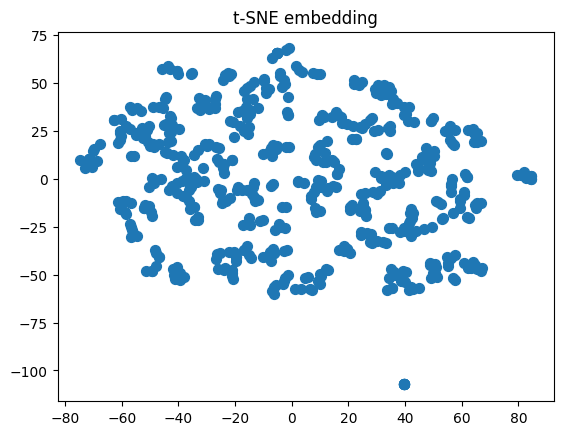

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],  cmap='viridis', s=50)
plt.title('t-SNE embedding')
plt.show()

In [ ]:
# Create TSNE object
tsne_3d = TSNE(n_components=3, perplexity=7, random_state=42)

# Fit and transform the data
X_tsne_3d = tsne_3d.fit_transform(data_subset_scaled)

<ipython-input-102-c4f6e7eca781>:5: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



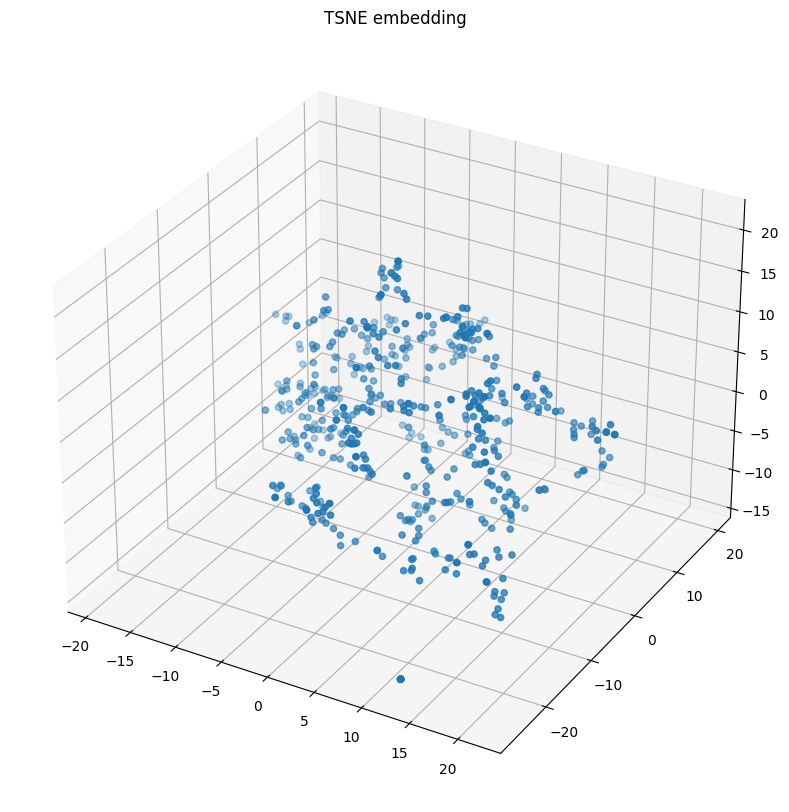

In [ ]:
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(X_tsne_3d[:,0],
             X_tsne_3d[:,1],
             X_tsne_3d[:,2],
             # c = y,
             cmap='viridis')

plt.title("TSNE embedding")

# show plot
plt.show()